In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import time
from math import ceil
from pathlib import Path
from matplotlib.colors import LogNorm
import yaml
from make_waveform import BatchedLightSimulation, mod0_sampler
from tqdm import tqdm, trange

import sys
sys.path.append('/sdf/home/c/carsmith/flash_reconstruction/siren-lartpc')
sys.path.append('..')

In [2]:
device = torch.device('cuda:0')

sim = BatchedLightSimulation(cfg="templates/waveform_sim.yaml").to(device)

BatchedLightSimulation Config:
	SINGLET_FRACTION: uniform(0.1, 0.5)
	LIGHT_OSCILLATION_PERIOD: uniform(0.05, 0.20)
	LIGHT_RESPONSE_TIME: uniform(0.01, 0.10)
	LIGHT_GAIN: uniform(-50.0, -20.0)
	TAU_S: uniform(0.0001, 0.01)
	TAU_T: uniform(0.9, 2.1)
	
	NOMINAL_SINGLET_FRACTION: 0.000000001 #0.35
	NOMINAL_LIGHT_OSCILLATION_PERIOD: 0.11     # us
	NOMINAL_LIGHT_RESPONSE_TIME: 0.055         # us^-1
	NOMINAL_TAU_S: 0.001                       # us
	NOMINAL_TAU_T: 1.530                       # us
	NOMINAL_LIGHT_GAIN: -45.0                  # ADC us/pe
	
	LIGHT_TICK_SIZE: 0.001
	LIGHT_WINDOW: [1, 10]


In [3]:
params = dict()

params['singlet_fraction'] = 0.33
params['light_oscillation_period'] = 0.11
params['light_response_time'] = 0.055
params['tau_s'] = 0.001
params['tau_t'] = 1.530
params['tpb_tau'] = 0.002
params['light_gain'] = -45.0

# Check it is updated
sim.reconfigure(params)
print(sim.singlet_fraction)

0.33


In [4]:
# parameters for inputs
pmt_ids = torch.arange(128)
arrival_times = torch.zeros(128, dtype=torch.int64)
nphotons = torch.full_like(pmt_ids, 781250)

In [5]:
# generate inputs / time forward
for _ in range(10):
    wf = sim.gen_waveform(mode='gaussian', pmt_ids=pmt_ids, nphotons=nphotons)
    output, info = sim(wf.to(device), combined=True)

total combined sampling time: 5.4045 sec
sipm response conv. time: 0.0386 sec
forward time: 5.4766 sec
total combined sampling time: 4.5653 sec
sipm response conv. time: 0.0011 sec
forward time: 4.5734 sec
total combined sampling time: 4.6554 sec
sipm response conv. time: 0.0009 sec
forward time: 4.6696 sec
total combined sampling time: 4.5242 sec
sipm response conv. time: 0.0010 sec
forward time: 4.5295 sec
total combined sampling time: 4.3144 sec
sipm response conv. time: 0.0008 sec
forward time: 4.3224 sec
total combined sampling time: 4.5489 sec
sipm response conv. time: 0.0008 sec
forward time: 4.5538 sec
total combined sampling time: 4.2493 sec
sipm response conv. time: 0.0009 sec
forward time: 4.2544 sec
total combined sampling time: 4.3543 sec
sipm response conv. time: 0.0008 sec
forward time: 4.3691 sec
total combined sampling time: 4.6478 sec
sipm response conv. time: 0.0008 sec
forward time: 4.6558 sec
total combined sampling time: 4.3058 sec
sipm response conv. time: 0.0009

(45,)


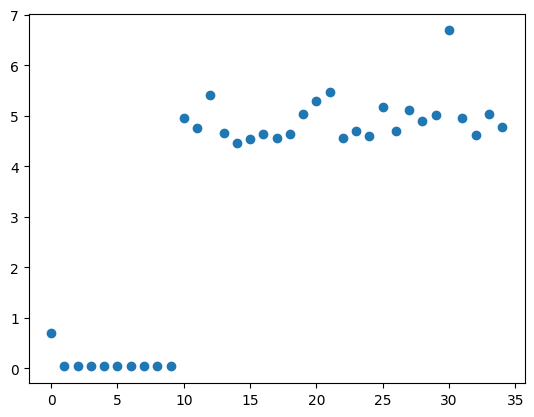

In [7]:
import pickle
data = np.loadtxt('sampling_times.txt')

print(data.shape)
plt.scatter(np.arange(len(data[:-10])), data[:-10])